# Penilaian

Data Cleaning: 15
1. Siswa mampu mengidentifikasi dan menangani anomali (missing values, outlier, data
formatting, dan/atau data duplikat) pada data.
2. Siswa mampu menjelaskan alasan untuk tahapan penanganan anomali yang
dilakukan.

Data Visualisation: 20
1. Siswa mampu menampilkan visualisasi sesuai keperluan analisis menggunakan
Python dan Tableau.

Statistics: 15
1. Siswa mampu menggunakan statistika deskriptif atau inferensial sesuai keperluan
analisis.

Analisis: 25
1. Siswa mampu menyampaikan insight (temuan) hasil analisis (visualisasi/ tabel/ uji
statistik) sesuai dengan masalah yang telah didefinisikan. Temuan disampaikan
secara runut, masuk akal dan kritis, sehingga bisa membantu menyelesaikan
masalah yang ditetapkan di awal.
2. Siswa mampu memberikan actionable recommendation kepada perusahaan atau
stakeholders berdasarkan konteks masalah dan analisis yang dilakukan.

Video & Dokumentasi: 25
1. Siswa mampu menjelaskan konteks permasalahan yang hendak dianalisis.
2. Siswa mampu menjelaskan bagaimana analisis dilakukan, dan apakah analisis
tersebut mampu menyelesaikan permasalahan.
3. Siswa sudah mengumpulkan dokumentasi code yang dibuat secara lengkap dalam
format Jupyter Notebook (.ipynb) dan link ke story Tableau Public.

# 1. DATA UNDERSTANDING

`Import Libraries`

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

`Load Dataset`

In [365]:
df = pd.read_csv('crime.csv', encoding='windows-1254')
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


`Dataset Info`

In [366]:
df.shape

(319073, 17)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [368]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OFFENSE_CODE,319073.0,2317.546956,1185.285543,111.000000,1001.000000,2907.000000,3201.000000,3831.000000
YEAR,319073.0,2016.560586,0.996344,2015.000000,2016.000000,2017.000000,2017.000000,2018.000000
MONTH,319073.0,6.609719,3.273691,1.000000,4.000000,7.000000,9.000000,12.000000
HOUR,319073.0,13.118205,6.294205,0.000000,9.000000,14.000000,18.000000,23.000000
Lat,299074.0,42.214381,2.159766,-1.000000,42.297442,42.325538,42.348624,42.395042
Long,299074.0,-70.908272,3.493618,-71.178674,-71.097135,-71.077524,-71.062467,-1.000000


In [369]:
df.describe(include='object').T

,count,unique,top,freq
INCIDENT_NUMBER,319073,282517,I162030584,13
OFFENSE_CODE_GROUP,319073,67,Motor Vehicle Accident Response,37132
OFFENSE_DESCRIPTION,319073,244,SICK/INJURED/MEDICAL - PERSON,18783
DISTRICT,317308,12,B2,49945
REPORTING_AREA,319073,879,,20250
SHOOTING,1019,1,Y,1019
OCCURRED_ON_DATE,319073,233229,2017-06-01 00:00:00,29
DAY_OF_WEEK,319073,7,Friday,48495
UCR_PART,318983,4,Part Three,158553
STREET,308202,4657,WASHINGTON ST,14194


In [370]:
df.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

`Data Understanding`

1. INCIDENT_NUMBER

In [371]:
df['INCIDENT_NUMBER'].value_counts()

I162030584    13
I152080623    11
I172013170    10
I182065208    10
I172096394    10
              ..
I172059460     1
I172059458     1
I172059457     1
I172059456     1
142052550      1
Name: INCIDENT_NUMBER, Length: 282517, dtype: int64

Kolom INCIDENT_NUMBER merupakan nomor pencatatan kejadian/peristiwa kejahatan. Terlihat bahwa terdapat beberapa records kejadian yang memiliki INCIDENT_NUMBER yang sama. Format penulisan INCIDENT_NUMBER secara sekilas juga tidak memiliki suatu pola tertentu dan indikator INCIDENT_NUMBER tersebut sulit untuk dilakukan visualisasi dan analisis, sehingga pada analisis ini kolom INCIDENT_NUMBER hanya akan digunakan untuk mengetahui jumlah kejadian saja.

2. OFFENSE_CODE

In [372]:
df['OFFENSE_CODE'].value_counts()

3006    18783
3115    18754
3831    16323
1402    15154
802     14799
        ...  
404         1
112         1
2609        1
2606        1
1864        1
Name: OFFENSE_CODE, Length: 222, dtype: int64

Kolom OFFENSE_CODE merupakan kode unik untuk kejadian pelanggaran yang tercatat. Data ini akan digunakan untuk analisis yang dikelompokkan berdasarkan kode pelanggarannya.

3. OFFENSE_CODE_GROUP

In [373]:
df['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

Kolom OFFENSE_CODE_GROUP merupakan kode dari pelanggaran yang tercatat berdasarkan grup pelanggarannya. Terlihat bahwa terdapat 67 jenis grup kejahatan. Data ini akan digunakan untuk analisis karakteristik pelanggaran berdasarkan grup pelanggarannya.

4. OFFENSE_DESCRIPTION

In [374]:
df['OFFENSE_DESCRIPTION'].value_counts()

SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18754
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15154
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
KILLING OF FELON BY POLICE                         1
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON         1
DRUGS - GLUE INHALATION                            1
ROBBERY - KNIFE - STREET                           1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: OFFENSE_DESCRIPTION, Length: 244, dtype: int64

Kolom 'OFFENSE_DESCRIPTION' mencatat penjelasan/keterangan/deskripsi tentang pelanggaran yang terjadi. Terlihat bahwa ada 244 jenis pelanggaran yang tercatat. Kolom ini akan digunakan untuk analisis berkaitan dengan karakteristik pelanggaran yang tercatat.

In [375]:
df[['OFFENSE_DESCRIPTION', 'OFFENSE_CODE_GROUP']].groupby(['OFFENSE_CODE_GROUP']).value_counts()

OFFENSE_CODE_GROUP  OFFENSE_DESCRIPTION                            
Aggravated Assault  ASSAULT - AGGRAVATED - BATTERY                     4886
                    ASSAULT - AGGRAVATED                               2910
                    ASSAULT & BATTERY D/W - OTHER                         6
                    A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.          1
                    ASSAULT & BATTERY D/W - OTHER ON POLICE OFFICER       1
                                                                       ... 
Violations          VAL - OPERATING AFTER REV/SUSP.                    2618
                    VAL - OPERATING WITHOUT LICENSE                    1963
                    VAL - OPERATING UNREG/UNINS  CAR                   1051
                    VAL - OPERATING W/O AUTHORIZATION LAWFUL            463
Warrant Arrests     WARRANT ARREST                                     8407
Length: 245, dtype: int64

In [376]:
df[['OFFENSE_CODE', 'OFFENSE_CODE_GROUP']].groupby(['OFFENSE_CODE']).value_counts()

OFFENSE_CODE  OFFENSE_CODE_GROUP             
111           Homicide                             161
112           Manslaughter                           1
121           Manslaughter                           5
123           Manslaughter                           2
301           Robbery                             3056
                                                 ...  
3811          Motor Vehicle Accident Response      426
3820          Motor Vehicle Accident Response     1656
3821          Motor Vehicle Accident Response      414
3830          Motor Vehicle Accident Response     1286
3831          Motor Vehicle Accident Response    16323
Length: 223, dtype: int64

5. 'DISTRICT'

In [377]:
df['DISTRICT'].unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

In [378]:
df['DISTRICT'].describe()

count     317308
unique        12
top           B2
freq       49945
Name: DISTRICT, dtype: object

In [379]:
df['DISTRICT'].isna().sum()

1765

Terdapat 1765 missing value pada kolom 'DISTRICT'.

Berdasarkan The Official Website of the Boston Police Department (https://bpdnews.com/districts), berikut ini daftar kode districts dan nama districts-nya.
1. District A-1 & A-15, Downtown & Charlestown, 40 New Sudbury Street, Boston
2. District A-7, East Boston, 69 Paris Street, East Boston
3. District B-2, Roxbury, 2400 Washington Street, Roxbury
4. District B-3, Mattapan, 1165 Blue Hill Avenue, Mattapan
5. District C-6, South Boston, 101 West Broadway, South Boston
6. District C-11, Dorchester, 40 Gibson Street, Dorchester
7. District D-4, South End, 650 Harrison Avenue, Boston
8. District D-14, Brighton, 301 Washington Street, Brighton
9. District E-5, West Roxbury, 1708 Centre Street, West Roxbury
10. District E-13, Jamaica Plain, 3347 Washington Street, Jamaica Plain
11. District E-18, Hyde Park, 1249 Hyde Park Avenue, Hyde Park

6. 'STREET'

In [380]:
pvt = df.pivot_table(index='DISTRICT', values='STREET', aggfunc='sum')
pvt

,STREET
DISTRICT,
A1,BEACON STBEACH STBEACH STBEACH STWINTER STHANO...
A15,HIGH STCAMBRIDGE STCAMBRIDGE STCAMBRIDGE STRUT...
A7,COTTAGE STBENNINGTON STSUMNER STCHELSEA STSUMN...
B2,NORMANDY STLAWN STHORADAN WAYSHIRLEY STANNUNCI...
B3,DELHI STWOODROW AVEMULVEY STCAPEN STBLUE HILL ...
C11,HECLA STTALBOT AVELESLIE STSTONEHURST STANNAPO...
C6,MASSACHUSETTS AVEOCEAN VIEW DRDALESSIO CTA STM...
D14,LINCOLN STCHESTNUT HILL AVEPRISCILLA RDSHEPARD...
D4,CAZENOVE STNEWCOMB STMARLBOROUGH STHUNTINGTON ...


In [381]:
df[df['DISTRICT']=='A1']['STREET'].unique()

array(['BEACON ST', nan, 'BEACH ST', 'WINTER ST', 'HANOVER ST',
       'MARTHA RD', 'NEW SUDBURY ST', 'ENDICOTT ST', 'TEMPLE PL',
       'BEVERLY ST', 'MILK ST', 'ATLANTIC AVE', 'ARLINGTON ST',
       'HARVARD ST', 'TREMONT ST', 'FAYETTE ST',
       'FANEUIL HALL MARKETPLACE', 'COLUMBUS AVE', 'BOYLSTON ST',
       'SUMMER ST', 'HULL ST', 'WASHINGTON ST', 'MCKINLEY SQ', 'CANAL ST',
       'HENCHMAN ST', 'COURT ST', 'CAUSEWAY ST', 'BOWDOIN ST',
       'BLACKSTONE ST', 'PRINCE ST', 'COMMERCIAL ST', 'OXFORD ST',
       'SALEM ST', 'CHARLES ST', 'STATE ST', 'CAMBRIDGE ST',
       'S RUSSELL ST', 'PARK ST', 'STUART ST', 'SCHOOL ST', 'BOWKER ST',
       'MASON ST', 'CITY HALL PLZ', 'FRUIT ST', 'SOUTH ST', 'W CEDAR ST',
       'WEST ST', 'CHESTNUT ST', 'JOY ST', 'ARCH ST', 'CONGRESS ST',
       'BULFINCH PL', 'REVERE ST', 'CENTER PLZ', 'BLOSSOM ST',
       'LINCOLN ST', 'LIBERTY SQ', 'N BENNET CT', 'THACHER ST',
       'FRANKLIN ST', 'FANEUIL HALL SQ', 'GROVE ST',
       'JOHN F. FITZGERALD SU

In [382]:
df['STREET'].value_counts()

WASHINGTON ST        14194
BLUE HILL AVE         7794
BOYLSTON ST           7221
DORCHESTER AVE        5149
TREMONT ST            4796
                     ...  
MYLES STANDISH RD        1
ROLLINS PL               1
MCLELLAN                 1
EWER ST                  1
ELMHILL                  1
Name: STREET, Length: 4657, dtype: int64

In [383]:
df[df['STREET'].isna()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
15,I182070920,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,NaN,2018-09-03 19:43:00,2018,9,Monday,19,Part Three,NaN,42.352875,-71.073830,"(42.35287456, -71.07382970)"
25,I182070906,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
39,I182070889,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
40,I182070889,3125,Warrant Arrests,WARRANT ARREST,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Three,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
41,I182070889,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318811,I142054044-00,3125,Warrant Arrests,WARRANT ARREST,E13,565,NaN,2015-07-17 00:00:00,2015,7,Friday,0,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
318812,I142054044-00,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",E13,565,NaN,2015-07-17 00:00:00,2015,7,Friday,0,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319015,I120720047-00,3125,Warrant Arrests,WARRANT ARREST,E13,565,NaN,2015-07-17 09:23:00,2015,7,Friday,9,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319016,I120720047-00,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",E13,565,NaN,2015-07-17 09:23:00,2015,7,Friday,9,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


6. 'REPORTING_AREA'

In [384]:
df[['REPORTING_AREA']].describe()

,REPORTING_AREA
count,319073
unique,879
top,
freq,20250


In [385]:
df['REPORTING_AREA'].value_counts()

       20250
111     2372
186     2016
329     1878
117     1832
       ...  
665       12
669       11
745        7
190        5
950        1
Name: REPORTING_AREA, Length: 879, dtype: int64

In [386]:
df[(df['DISTRICT'].isna()) & (df['REPORTING_AREA']==' ')]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
15,I182070920,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,NaN,2018-09-03 19:43:00,2018,9,Monday,19,Part Three,NaN,42.352875,-71.073830,"(42.35287456, -71.07382970)"
20,I182070913,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,NaN,2018-09-03 18:46:00,2018,9,Monday,18,Part Three,WOLCOTT,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
25,I182070906,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018-09-03 18:20:00,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
39,I182070889,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Two,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
40,I182070889,3125,Warrant Arrests,WARRANT ARREST,NaN,,NaN,2018-09-03 18:05:00,2018,9,Monday,18,Part Three,NaN,42.306769,-71.084319,"(42.30676881, -71.08431925)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318337,I152049991,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",NaN,,NaN,2015-06-16 18:35:00,2015,6,Tuesday,18,Part Two,HAMILTON,NaN,NaN,"(0.00000000, 0.00000000)"
318338,I152049991,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",NaN,,NaN,2015-06-16 18:35:00,2015,6,Tuesday,18,Part Two,HAMILTON,NaN,NaN,"(0.00000000, 0.00000000)"
318528,I152049734,1845,Drug Violation,DRUGS - POSS CLASS D,NaN,,NaN,2015-06-15 19:00:00,2015,6,Monday,19,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
318551,I152049699,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,NaN,,NaN,2015-06-15 17:13:00,2015,6,Monday,17,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


In [387]:
df[(df['DISTRICT'].isna()) & (df['REPORTING_AREA']!=' ')]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
21664,I182047516,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,NaN,36,NaN,2018-06-15 16:00:00,2018,6,Friday,16,Part Two,HOTEL DR,42.367377,-71.024467,"(42.36737713, -71.02446667)"
43081,I182024758,3830,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PERSONAL INJURY,NaN,36,NaN,2018-03-26 19:00:00,2018,3,Monday,19,Part Three,TRANSPORTATION WAY,42.367937,-71.028878,"(42.36793747, -71.02887772)"
148239,I172020116,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,NaN,222,NaN,2017-03-14 16:31:00,2017,3,Tuesday,16,Other,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
148240,I172020116,3114,Investigate Property,INVESTIGATE PROPERTY,NaN,222,NaN,2017-03-14 16:31:00,2017,3,Tuesday,16,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
156503,I172011395,3201,Property Lost,PROPERTY - LOST,NaN,36,NaN,2017-02-10 20:30:00,2017,2,Friday,20,Part Three,TERMINAL C,42.366400,-71.017306,"(42.36639951, -71.01730643)"
158683,I172009047,2647,Other,THREATS TO DO BODILY HARM,NaN,32,NaN,2017-01-16 18:30:00,2017,1,Monday,18,Part Two,TOMAHAWK DR,42.366622,-71.030454,"(42.36662219, -71.03045437)"
174677,I162098285,3811,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY,NaN,611,NaN,2016-12-02 13:27:00,2016,12,Friday,13,Part Three,JAMAICAWAY,42.331351,-71.113147,"(42.33135062, -71.11314725)"
182238,I162090138,3102,Other,INVESTIGATION FOR ANOTHER AGENCY,NaN,36,NaN,2016-10-28 00:00:00,2016,10,Friday,0,Part Three,HOTEL DR,42.367377,-71.024467,"(42.36737713, -71.02446667)"
185024,I162087205,1848,Drug Violation,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP,NaN,36,NaN,2016-10-24 16:24:00,2016,10,Monday,16,Part Two,TRANSPORTATION WAY,42.367937,-71.028878,"(42.36793747, -71.02887772)"
185025,I162087205,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,NaN,36,NaN,2016-10-24 16:24:00,2016,10,Monday,16,Other,TRANSPORTATION WAY,42.367937,-71.028878,"(42.36793747, -71.02887772)"


Terdapat 20250 baris yang kosong pada kolom 'REPORTING_AREA', yang mana 1735 baris di antaranya memiliki missing value pada kolom 'DISTRICT'.

7. 'SHOOTING'

In [388]:
df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [389]:
df['SHOOTING'].value_counts()

Y    1019
Name: SHOOTING, dtype: int64

In [390]:
df['SHOOTING'].isna().sum()

318054

# 2. DATA CLEANING

## 1. MISSING VALUE

Langkah pertama dalam data cleaning yang akan dilakukan adalah menangani missing values. Akan ditinjau data-data yang memiliki missing value di setiap kolom yang ada, kemudian dihitung berapa presentase missing values tersebut dari keseluruhan data, kemudian baru akan dilakukan penanganan terhadap missing values tersebut.

In [391]:
data = pd.read_csv('crime.csv', encoding='windows-1254')
data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [393]:
data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [394]:
def missing_value(data):
    mis_val = data.isnull().sum()
    mis_val_percent = 100 * data.isnull().sum() / len(data)
    mv_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mv_table = mv_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values'})
    mv_table['Data Type'] = data.dtypes
    mv_table = mv_table[mv_table.iloc[:,1] != 0].sort_values('% of Total Missing Values', ascending=False).round(2)
    print(f"Dataframe ini terdiri dari {str(data.shape[1])} kolom dan {str(data.shape[0])} baris.\nTerdapat {str(mv_table.shape[0])} kolom di antaranya yang memiliki missing values.")
    return mv_table

missing_value(data)

Dataframe ini terdiri dari 17 kolom dan 319073 baris.
Terdapat 6 kolom di antaranya yang memiliki missing values.


,Missing Values,% of Total Missing Values,Data Type
SHOOTING,318054,99.68,object
Lat,19999,6.27,float64
Long,19999,6.27,float64
STREET,10871,3.41,object
DISTRICT,1765,0.55,object
UCR_PART,90,0.03,object


<AxesSubplot:>

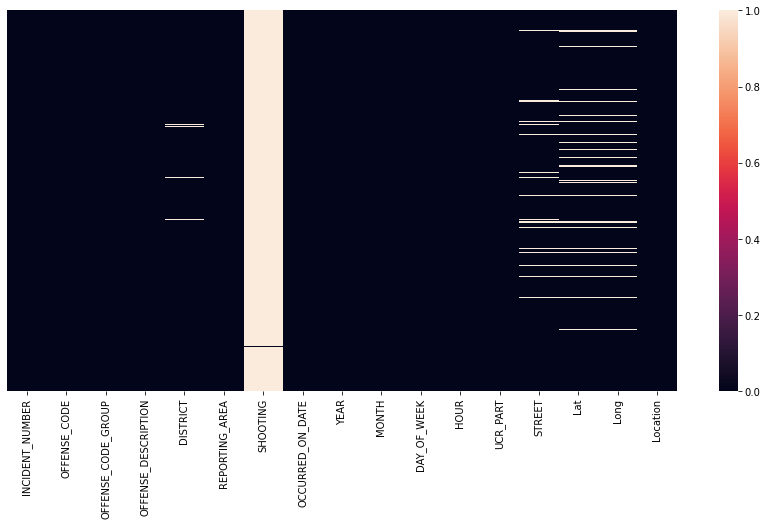

In [395]:
figure = plt.figure(figsize=(15,7))
sns.heatmap(data.isnull(),yticklabels='')

### 1. SHOOTING

In [396]:
data['SHOOTING'].describe()

count     1019
unique       1
top          Y
freq      1019
Name: SHOOTING, dtype: object

In [397]:
data['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

Dari ringkasan di atas, terdapat 99.68% baris data kosong yang terdapat pada kolom SHOOTING. Terlihat bahwa kolom SHOOTING hanya memiliki satu nilai unik, yaitu 'Y' dengan jumlah baris 1019, sedangkan sisanya yaitu 318054 baris kosong. Dapat dimungkinkan bahwa baris yang kosong pada kolom SHOOTING mengindikasikan bahwa tidak dilakukan penembakan oleh polisi di lokasi kejadian, sehingga kolom SHOOTING tidak diisi. Dalam analisis ini, akan diasumsikan dengan kemungkinan tersebut, sehingga missing value yang ada pada kolom SHOOTING akan diisi dengan nilai 'N'.

In [398]:
data['SHOOTING'].fillna(value='N', inplace=True)
data.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1765
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  90
STREET                 10871
Lat                    19999
Long                   19999
Location                   0
dtype: int64

### 2. Lat and Long

Dari ringkasan data di atas, diketahui bahwa terdapat 19999 baris missing value yang ada pada kolom Lat dan Long dengan posisi baris yang sama. Pertama akan ditinjau apakah missing value pada kolom Lat dan Long memiliki data pada kolom STREET. Apabila pada kolom STREET juga kosong, maka baris tersebut akan dihapus. Selanjutnya, untuk baris yang memiliki nilai pada kolom STREET, akan dilakukan konversi dari nama STREET menjadi aproksimasi dari nilai latitude, longitude, dan koordinat lokasi-nya.

#### DROP the Lat, Long, and STREET NaN

In [399]:
data[(data['Lat'].isnull()) & (data['Long'].isnull())][['STREET', 'Lat', 'Long', 'Location']]

,STREET,Lat,Long,Location
42,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
386,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
405,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
482,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
483,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...
319016,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319017,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319042,CAMBRIDGE ST,NaN,NaN,"(0.00000000, 0.00000000)"
319059,GENEVA AVE,NaN,NaN,"(0.00000000, 0.00000000)"


In [400]:
data[(data['Lat'].isnull()) & (data['Long'].isnull()) & (data['STREET'].isnull())][['STREET', 'Lat', 'Long', 'Location']]

,STREET,Lat,Long,Location
42,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
386,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
405,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
482,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
483,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...
318811,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
318812,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319015,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
319016,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


In [401]:
data.dropna(subset=['STREET', 'Lat', 'Long'], how='all', inplace=True)
data.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1673
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  90
STREET                  1885
Lat                    11013
Long                   11013
Location                   0
dtype: int64

#### FILL Lat, Long, and Location with Geopy

In [402]:
data[(data['Lat'].isnull()) & (data['Long'].isnull())][['STREET', 'Lat', 'Long', 'Location']]

,STREET,Lat,Long,Location
883,WARREN,NaN,NaN,"(0.00000000, 0.00000000)"
1075,KILMARNOCK ST,NaN,NaN,"(0.00000000, 0.00000000)"
1089,BLUE HILL AVE,NaN,NaN,"(0.00000000, 0.00000000)"
1090,BLUE HILL AVE,NaN,NaN,"(0.00000000, 0.00000000)"
1091,BLUE HILL AVE,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...
318999,SAVIN HILL AV,NaN,NaN,"(0.00000000, 0.00000000)"
319014,COMMONWEALTH AVE,NaN,NaN,"(0.00000000, 0.00000000)"
319042,CAMBRIDGE ST,NaN,NaN,"(0.00000000, 0.00000000)"
319059,GENEVA AVE,NaN,NaN,"(0.00000000, 0.00000000)"


In [403]:
def latitude(street):
    from geopy.geocoders import Nominatim
    from geopy.exc import GeocoderTimedOut
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.geocode(street)
    return location.latitude

def longitude(street):
    from geopy.geocoders import Nominatim
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.geocode(street)
    return location.latitude

def location(street):
    from geopy.geocoders import Nominatim
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.geocode(street)
    return (location.latitude, location.longitude)

In [404]:
list_location = []

for i in range(0, 5):
    Location = location(data['STREET'].iloc[data.index[data['Lat'].isnull()][i]])
    list_location.append(Location)
    i+=1

list_location

[(42.3516832, -71.0714533),
 (38.7951831, -77.0729612),
 (40.73404, -74.0084959),
 (51.737322, 0.4769264),
 (39.2308408, -76.8517067)]

In [405]:
data[(data['Lat'].isnull()) & (data['Long'].isnull())]['Location'].value_counts()

(0.00000000, 0.00000000)    11013
Name: Location, dtype: int64

Terdapat 19999 baris missing values yang berada pada kolom Lat dan Long, yang ternyata pada baris-baris tersebut nilai pada kolom Location adalah zero values (0.00000000, 0.00000000), yang secara geografis letak koordinat tersebut tidak berada di dataran bumi. Dengan demikian 19999 baris missing values tersebut akan didrop dari data.

In [406]:
data.drop(index=data.index[data['Lat'].isnull()], inplace=True)
data.reset_index(inplace=True)
data.drop(columns='index', inplace=True)
data.isnull().sum()

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
OFFENSE_DESCRIPTION       0
DISTRICT               1481
REPORTING_AREA            0
SHOOTING                  0
OCCURRED_ON_DATE          0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
UCR_PART                 90
STREET                 1885
Lat                       0
Long                      0
Location                  0
dtype: int64

In [407]:
data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299069,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
299070,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
299071,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
299072,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


### 3. DISTRICT and STREET

In [408]:
data[(data['DISTRICT'].isnull()) | (data['STREET'].isnull())][['DISTRICT', 'STREET', 'Lat', 'Long']]

,DISTRICT,STREET,Lat,Long
15,NaN,NaN,42.352875,-71.073830
20,NaN,WOLCOTT,-1.000000,-1.000000
25,NaN,NaN,42.283593,-71.055657
39,NaN,NaN,42.306769,-71.084319
40,NaN,NaN,42.306769,-71.084319
...,...,...,...,...
292723,NaN,WASHINGTON ST,42.257949,-71.161229
295203,NaN,JOHN ELIOT,-1.000000,-1.000000
295204,NaN,JOHN ELIOT,-1.000000,-1.000000
295429,NaN,NIXON,-1.000000,-1.000000


Secara sekilas terlihat bahwa terdapat beberapa data Lat dan Long yang nilainya tidak make sense, yaitu bernilai -1.000000. SEcara geografis nilai latitude dan longitude tersebut tidak berada di daratan Boston. Oleh karena itu, akan dilakukan data cleaning terlebih dahulu pada nilai-nilai tersebut.

#### Dealing with Lat and Long first

<AxesSubplot:>

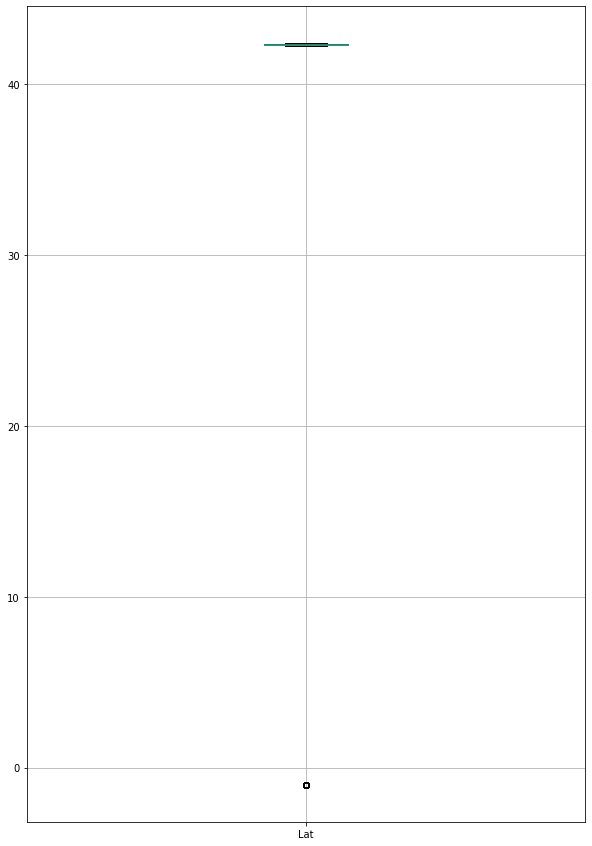

In [409]:
data.boxplot(column=['Lat'], figsize=(10, 15))

In [410]:
data[data['Lat']<40][['Lat', 'Long', 'Location']].value_counts()

Lat   Long  Location                  
-1.0  -1.0  (-1.00000000, -1.00000000)    745
dtype: int64

<AxesSubplot:>

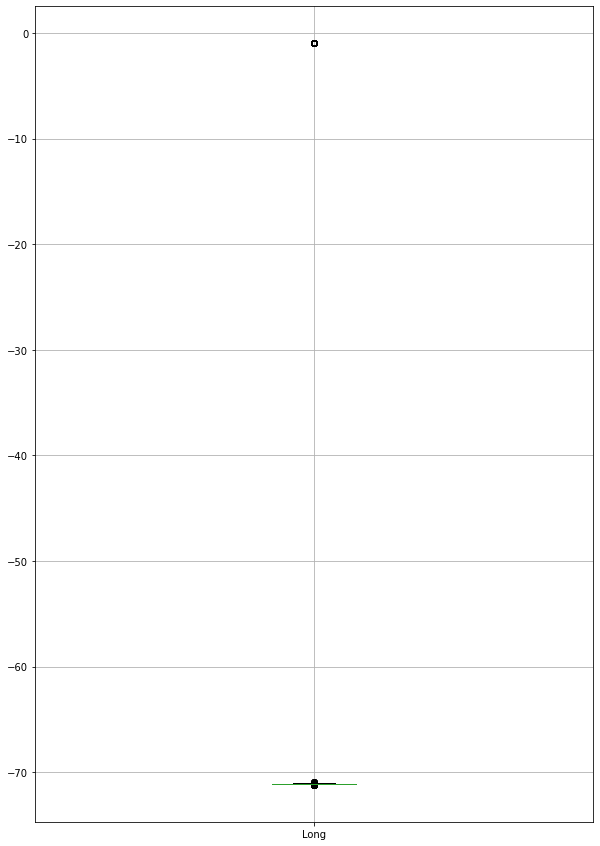

In [411]:
data.boxplot(column=['Long'], figsize=(10, 15))

In [412]:
data[data['Long']>-70][['Lat', 'Long', 'Location']].value_counts()

Lat   Long  Location                  
-1.0  -1.0  (-1.00000000, -1.00000000)    745
dtype: int64

Terlihat bahwa terdapat 745 baris data yang tidak make sense pada kolom Lat, Long, dan Location. Karena nilai tersebut secara geografis tidak berada pada daratan, maka data outliers tersebut akan dihapus atau didrop dari data.

In [413]:
data.drop(index=data.index[data['Lat']<40], inplace=True)
data.reset_index(inplace=True)
data.drop(columns='index', inplace=True)
data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298324,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
298325,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
298326,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
298327,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


### 4. REPORTING AREA

In [414]:
data['REPORTING_AREA'].value_counts()

111    2338
       2085
329    1868
117    1831
186    1792
       ... 
669      11
960      10
745       7
190       5
950       1
Name: REPORTING_AREA, Length: 878, dtype: int64

In [415]:
data[data['REPORTING_AREA'] == ' '][['DISTRICT', 'REPORTING_AREA', 'STREET', 'Location']]

,DISTRICT,REPORTING_AREA,STREET,Location
15,NaN,,NaN,"(42.35287456, -71.07382970)"
24,NaN,,NaN,"(42.28359328, -71.05565683)"
38,NaN,,NaN,"(42.30676881, -71.08431925)"
39,NaN,,NaN,"(42.30676881, -71.08431925)"
40,NaN,,NaN,"(42.30676881, -71.08431925)"
...,...,...,...,...
290803,C6,,COLUMBIA RD,"(42.32952400, -71.03558397)"
290845,A1,,CHARLES ST,"(42.36251648, -71.07066850)"
290846,A1,,CHARLES ST,"(42.36251648, -71.07066850)"
292113,C6,,WILLIAM J DAY BLVD,"(42.32267819, -71.04932912)"


In [416]:
data[(data['REPORTING_AREA'] == ' ') & (data['DISTRICT'].isnull()) & (data['STREET'].isnull())][['DISTRICT', 'REPORTING_AREA', 'STREET', 'Location']]

,DISTRICT,REPORTING_AREA,STREET,Location
15,NaN,,NaN,"(42.35287456, -71.07382970)"
24,NaN,,NaN,"(42.28359328, -71.05565683)"
38,NaN,,NaN,"(42.30676881, -71.08431925)"
39,NaN,,NaN,"(42.30676881, -71.08431925)"
40,NaN,,NaN,"(42.30676881, -71.08431925)"
...,...,...,...,...
203382,NaN,,NaN,"(42.35135655, -71.11856726)"
203388,NaN,,NaN,"(42.35409489, -71.05859658)"
203533,NaN,,NaN,"(42.29346210, -71.08298718)"
203927,NaN,,NaN,"(42.29484548, -71.08785568)"


In [417]:
print(f"Persentase baris kosong pada REPORTING_AREA adalah {round(2085/298329, 2)} %")

Persentase baris kosong pada REPORTING_AREA adalah 0.01 %


Terdapat 2085 baris data anomali pada kolom REPORTING AREA, yaitu sebesar 0.01% dari keseluruhan data yang bnank/kosong, hanya berisikan spasi ' ' saja. Dari 2085 baris data REPORTING_AREA yang blank/kosong, ternyata 860 baris diantaranya juga memiliki missing value pada kolom DISTRICT dan STREET. Pertama, 860 baris kosong tersebut terlebih dahulu akan dihapus atau didrop dari data.

In [418]:
data.drop(index=data.index[[(data['REPORTING_AREA'] == ' ') & (data['DISTRICT'].isnull()) & (data['STREET'].isnull())]], inplace=True)
data.reset_index(inplace=True)
data.drop(columns='index', inplace=True)
data.isnull().sum()

INCIDENT_NUMBER          0
OFFENSE_CODE             0
OFFENSE_CODE_GROUP       0
OFFENSE_DESCRIPTION      0
DISTRICT                37
REPORTING_AREA           0
SHOOTING                 0
OCCURRED_ON_DATE         0
YEAR                     0
MONTH                    0
DAY_OF_WEEK              0
HOUR                     0
UCR_PART                90
STREET                 921
Lat                      0
Long                     0
Location                 0
dtype: int64

#### FILL DISTRICT BASED ON STREET

Selanjutnya missing values pada kolom DISTRICT akan diisi dengan menggunakan data pada kolom STREET yang bersesuaian.

In [419]:
data[(data['DISTRICT'].isnull()) & (data['STREET'].notnull())]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
669,I182070134,802,Simple Assault,ASSAULT SIMPLE - BATTERY,NaN,,N,2018-08-31 23:22:00,2018,8,Friday,23,Part Two,FANEUIL HALL MARKETPLACE,42.359980,-71.054741,"(42.35997967, -71.05474135)"
670,I182070134,2647,Other,THREATS TO DO BODILY HARM,NaN,,N,2018-08-31 23:22:00,2018,8,Friday,23,Part Two,FANEUIL HALL MARKETPLACE,42.359980,-71.054741,"(42.35997967, -71.05474135)"
5090,I182064910,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,N,2018-08-14 19:52:00,2018,8,Tuesday,19,Part Three,RIVER,42.333351,-71.112291,"(42.33335116, -71.11229054)"
8522,I182060813,619,Larceny,LARCENY ALL OTHERS,NaN,,N,2018-08-01 11:00:00,2018,8,Wednesday,11,Part One,BROADWAY,42.385841,-71.077591,"(42.38584106, -71.07759142)"
11048,I182057836,3301,Verbal Disputes,VERBAL DISPUTE,NaN,,N,2018-07-22 19:36:00,2018,7,Sunday,19,Part Three,RIVER,42.333351,-71.112291,"(42.33335116, -71.11229054)"
14886,I182053415,802,Simple Assault,ASSAULT SIMPLE - BATTERY,NaN,,N,2018-07-07 14:36:00,2018,7,Saturday,14,Part Two,RIVER,42.333351,-71.112291,"(42.33335116, -71.11229054)"
17205,I182050776,3114,Investigate Property,INVESTIGATE PROPERTY,NaN,,N,2018-06-28 16:15:00,2018,6,Thursday,16,Part Three,FENWAY,42.346189,-71.090806,"(42.34618944, -71.09080599)"
20034,I182047516,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,NaN,36,N,2018-06-15 16:00:00,2018,6,Friday,16,Part Two,HOTEL DR,42.367377,-71.024467,"(42.36737713, -71.02446667)"
22766,I182044420,3201,Property Lost,PROPERTY - LOST,NaN,,N,2018-03-24 08:00:00,2018,3,Saturday,8,Part Three,CHARLESGATE,42.349925,-71.092233,"(42.34992498, -71.09223283)"
30651,I182035322,724,Auto Theft,AUTO THEFT,NaN,,N,2018-05-09 22:03:00,2018,5,Wednesday,22,Part One,ARBORWAY,42.310737,-71.122042,"(42.31073736, -71.12204221)"


In [420]:
district_by_street = data[(data['DISTRICT'].isnull()) & (data['STREET'].notnull())]['STREET']
district_by_street.unique()

array(['FANEUIL HALL MARKETPLACE', 'RIVER', 'BROADWAY', 'FENWAY',
       'HOTEL DR', 'CHARLESGATE', 'ARBORWAY', 'TRANSPORTATION WAY',
       'LEXINGTON', 'PUBLIC ALLEY NO. 420', 'TERMINAL C', 'TOMAHAWK DR',
       'JAMAICAWAY', 'UNION PARK', 'PUBLIC ALLEY NO. 433', 'GEORGE',
       'PUBLIC ALLEY NO. 404', 'PUBLIC ALLEY NO. 818', 'METROPOLITAN AVE',
       'AVENUE DE LAFAYETTE', 'CONDOR ST', 'WASHINGTON ST',
       'HUNTINGTON AVE'], dtype=object)

In [421]:
for street in district_by_street.unique():
    print(street, data['DISTRICT'][data['STREET'] == street].unique())

FANEUIL HALL MARKETPLACE ['A1' nan]
RIVER [nan 'B3']
BROADWAY [nan 'A15' 'C6']
FENWAY ['D4' 'B2' nan]
HOTEL DR [nan]
CHARLESGATE [nan 'D4']
ARBORWAY ['E13' nan 'B2']
TRANSPORTATION WAY [nan 'A7']
LEXINGTON [nan]
PUBLIC ALLEY NO. 420 [nan]
TERMINAL C [nan]
TOMAHAWK DR ['A7' nan]
JAMAICAWAY ['E13' nan]
UNION PARK ['D4' nan]
PUBLIC ALLEY NO. 433 [nan]
GEORGE [nan]
PUBLIC ALLEY NO. 404 [nan]
PUBLIC ALLEY NO. 818 [nan]
METROPOLITAN AVE ['E18' 'E5' nan]
AVENUE DE LAFAYETTE ['A1' nan]
CONDOR ST ['A7' nan]
WASHINGTON ST ['E5' 'C11' 'D14' 'A1' 'B2' 'E13' 'D4' 'E18' 'A15' 'B3' nan]
HUNTINGTON AVE ['D4' 'B2' 'E18' 'E13' nan]


In [422]:
data['DISTRICT'][(data['STREET'] == 'FANEUIL HALL MARKETPLACE')] = 'A1'
data['DISTRICT'][(data['STREET'] == 'RIVER')] = 'B3'
data['DISTRICT'][(data['STREET'] == 'CHARLESGATE')] = 'D4'
data['DISTRICT'][(data['STREET'] == 'TRANSPORTATION WAY')] = 'A7'
data['DISTRICT'][(data['STREET'] == 'TOMAHAWK DR')] = 'A7'
data['DISTRICT'][(data['STREET'] == 'JAMAICAWAY')] = 'E13'
data['DISTRICT'][(data['STREET'] == 'UNION PARK')] = 'D4'
data['DISTRICT'][(data['STREET'] == 'AVENUE DE LAFAYETTE')] = 'A1'
data['DISTRICT'][(data['STREET'] == 'CONDOR ST')] = 'A7'

In [423]:
district_by_street = data[(data['DISTRICT'].isnull()) & (data['STREET'].notnull())]['STREET']
district_by_street.unique()

array(['BROADWAY', 'FENWAY', 'HOTEL DR', 'ARBORWAY', 'LEXINGTON',
       'PUBLIC ALLEY NO. 420', 'TERMINAL C', 'PUBLIC ALLEY NO. 433',
       'GEORGE', 'PUBLIC ALLEY NO. 404', 'PUBLIC ALLEY NO. 818',
       'METROPOLITAN AVE', 'WASHINGTON ST', 'HUNTINGTON AVE'],
      dtype=object)

In [424]:
data.isnull().sum()

INCIDENT_NUMBER          0
OFFENSE_CODE             0
OFFENSE_CODE_GROUP       0
OFFENSE_DESCRIPTION      0
DISTRICT                18
REPORTING_AREA           0
SHOOTING                 0
OCCURRED_ON_DATE         0
YEAR                     0
MONTH                    0
DAY_OF_WEEK              0
HOUR                     0
UCR_PART                90
STREET                 921
Lat                      0
Long                     0
Location                 0
dtype: int64

FILL DISTRICT WITH GEOPY

In [425]:
def district(Latitude, Longitude):
    from geopy.geocoders import Nominatim
    geolocator = Nominatim(user_agent="geoapiExercises")
    Latitude = str(Latitude)
    Longitude = str(Longitude)
    location = geolocator.reverse(Latitude+","+Longitude)
    address = location.raw['address']
    suburb = address.get('suburb', '')
    return suburb

In [426]:
list_district = []

for i in range(0, data['DISTRICT'].isnull().sum()):
    District = district(data['Lat'].iloc[data.index[data['DISTRICT'].isnull()][i]], data['Long'].iloc[data.index[data['DISTRICT'].isnull()][i]])
    list_district.append(District)
    i+=1

list_district

['Charlestown',
 'Fenway / Kenmore',
 'East Boston',
 'Jamaica Plain',
 'Charlestown',
 'Back Bay',
 'East Boston',
 'East Boston',
 'Back Bay',
 'Roxbury',
 'Back Bay',
 'Fenway / Kenmore',
 'Fenway / Kenmore',
 'Fenway / Kenmore',
 'Hyde Park',
 'Fenway / Kenmore',
 'West Roxbury',
 'Mission Hill']

In [427]:
list_district[0]

'Charlestown'

In [428]:
data[data['DISTRICT'].isnull()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
8522,I182060813,619,Larceny,LARCENY ALL OTHERS,NaN,,N,2018-08-01 11:00:00,2018,8,Wednesday,11,Part One,BROADWAY,42.385841,-71.077591,"(42.38584106, -71.07759142)"
17205,I182050776,3114,Investigate Property,INVESTIGATE PROPERTY,NaN,,N,2018-06-28 16:15:00,2018,6,Thursday,16,Part Three,FENWAY,42.346189,-71.090806,"(42.34618944, -71.09080599)"
20034,I182047516,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,NaN,36,N,2018-06-15 16:00:00,2018,6,Friday,16,Part Two,HOTEL DR,42.367377,-71.024467,"(42.36737713, -71.02446667)"
30651,I182035322,724,Auto Theft,AUTO THEFT,NaN,,N,2018-05-09 22:03:00,2018,5,Wednesday,22,Part One,ARBORWAY,42.310737,-71.122042,"(42.31073736, -71.12204221)"
85680,I172079761,611,Larceny,LARCENY PICK-POCKET,NaN,,N,2017-09-25 00:55:00,2017,9,Monday,0,Part One,LEXINGTON,42.377630,-71.059202,"(42.37763033, -71.05920235)"
118473,I172041971,1402,Vandalism,VANDALISM,NaN,,N,2017-01-17 13:00:00,2017,1,Tuesday,13,Part Two,PUBLIC ALLEY NO. 420,42.354112,-71.075682,"(42.35411213, -71.07568185)"
145050,I172011395,3201,Property Lost,PROPERTY - LOST,NaN,36,N,2017-02-10 20:30:00,2017,2,Friday,20,Part Three,TERMINAL C,42.366400,-71.017306,"(42.36639951, -71.01730643)"
169074,I162090138,3102,Other,INVESTIGATION FOR ANOTHER AGENCY,NaN,36,N,2016-10-28 00:00:00,2016,10,Friday,0,Part Three,HOTEL DR,42.367377,-71.024467,"(42.36737713, -71.02446667)"
179859,I162077523,616,Larceny,LARCENY THEFT OF BICYCLE,NaN,,N,2016-09-22 11:10:00,2016,9,Thursday,11,Part One,PUBLIC ALLEY NO. 433,42.350383,-71.081224,"(42.35038342, -71.08122390)"
183074,I162073681,3114,Investigate Property,INVESTIGATE PROPERTY,NaN,,N,2016-09-10 01:01:00,2016,9,Saturday,1,Part Three,GEORGE,42.325497,-71.072249,"(42.32549692, -71.07224937)"


In [429]:
data['DISTRICT'].isnull().sum()

18

In [430]:
for i in range(0, data['DISTRICT'].isnull().sum()):
    data['DISTRICT'].fillna(value=list_district[i], limit=1, inplace=True)
    i+=1

In [431]:
data.isnull().sum()

INCIDENT_NUMBER          0
OFFENSE_CODE             0
OFFENSE_CODE_GROUP       0
OFFENSE_DESCRIPTION      0
DISTRICT                 0
REPORTING_AREA           0
SHOOTING                 0
OCCURRED_ON_DATE         0
YEAR                     0
MONTH                    0
DAY_OF_WEEK              0
HOUR                     0
UCR_PART                90
STREET                 921
Lat                      0
Long                     0
Location                 0
dtype: int64

In [432]:
data['DISTRICT'].unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15', 'Charlestown', 'Fenway / Kenmore', 'East Boston',
       'Jamaica Plain', 'Back Bay', 'Roxbury', 'Hyde Park',
       'West Roxbury', 'Mission Hill'], dtype=object)

Semua baris data pada kolom DISTRICT sudah terisi, selanjutnya nanti akan dilakukan data formatting agar mendapatkan data yang lebih mudah dipahami konteksnya.

#### DROP MISSING VALUE STREET

In [433]:
data['STREET'].isnull().sum()/data.shape[0]

0.0030961209403332786

Karena nilai unik street cukup bervariasi, dan nilai missing value pada kolom STREET tidaklah banyak, yaitu hanya 0.003% saja, maka missing value akan dihapus atau didrop.

In [434]:
data.drop(index=data.index[[data['STREET'].isnull()]], inplace=True)
data.reset_index(inplace=True)
data.drop(columns='index', inplace=True)
data.isnull().sum()

INCIDENT_NUMBER         0
OFFENSE_CODE            0
OFFENSE_CODE_GROUP      0
OFFENSE_DESCRIPTION     0
DISTRICT                0
REPORTING_AREA          0
SHOOTING                0
OCCURRED_ON_DATE        0
YEAR                    0
MONTH                   0
DAY_OF_WEEK             0
HOUR                    0
UCR_PART               90
STREET                  0
Lat                     0
Long                    0
Location                0
dtype: int64

#### DEALING WITH BLANK REPORTING AREA

In [435]:
blank_data = data[data['REPORTING_AREA'] == ' ']
blank_data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
645,I182070160,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,D14,,N,2018-09-01 02:24:00,2018,9,Saturday,2,Part Three,COMMONWEALTH AVE,42.350638,-71.112659,"(42.35063798, -71.11265909)"
669,I182070134,802,Simple Assault,ASSAULT SIMPLE - BATTERY,A1,,N,2018-08-31 23:22:00,2018,8,Friday,23,Part Two,FANEUIL HALL MARKETPLACE,42.359980,-71.054741,"(42.35997967, -71.05474135)"
670,I182070134,2647,Other,THREATS TO DO BODILY HARM,A1,,N,2018-08-31 23:22:00,2018,8,Friday,23,Part Two,FANEUIL HALL MARKETPLACE,42.359980,-71.054741,"(42.35997967, -71.05474135)"
1638,I182068986,619,Larceny,LARCENY ALL OTHERS,C6,,N,2018-08-10 12:30:00,2018,8,Friday,12,Part One,PIER 4,42.351674,-71.043357,"(42.35167379, -71.04335716)"
2299,I182068179,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,C6,,N,2018-08-25 15:09:00,2018,8,Saturday,15,Part Three,M ST,42.329855,-71.033175,"(42.32985506, -71.03317504)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289022,I152058141,617,Larceny,LARCENY THEFT FROM BUILDING,C6,,N,2015-07-13 14:41:00,2015,7,Monday,14,Part One,COLUMBIA RD,42.329524,-71.035584,"(42.32952400, -71.03558397)"
289064,I152058100,301,Robbery,ROBBERY - STREET,A1,,N,2015-07-13 23:00:00,2015,7,Monday,23,Part One,CHARLES ST,42.362516,-71.070668,"(42.36251648, -71.07066850)"
289065,I152058100,802,Simple Assault,ASSAULT SIMPLE - BATTERY,A1,,N,2015-07-13 23:00:00,2015,7,Monday,23,Part Two,CHARLES ST,42.362516,-71.070668,"(42.36251648, -71.07066850)"
290332,I152056603,3201,Property Lost,PROPERTY - LOST,C6,,N,2015-07-09 10:26:00,2015,7,Thursday,10,Part Three,WILLIAM J DAY BLVD,42.322678,-71.049329,"(42.32267819, -71.04932912)"


In [436]:
blank_data['REPORTING_AREA'][blank_data['STREET'].isin(blank_data['STREET'])].unique()

array([' '], dtype=object)

In [437]:
blank_data['STREET'].value_counts()

COMMONWEALTH AVE             102
COLUMBIA RD                   69
NASHUA ST                     39
WILLIAM J DAY BLVD            18
RIVER                         15
OLD COLONY AVE                15
GENERAL WILLIAM H DEVINE      13
CHARLES ST                    12
WILLIAM T MORRISSEY BLVD      11
COLONEL MICHAEL J. MCDONO      8
A ST                           7
SCIENCE PARK                   7
DAVID G MUGAR WAY              6
AVENUE DE LAFAYETTE            5
LEGENDS WAY                    4
FENWAY                         4
LONG ISLAND RD                 4
L ST                           4
FANEUIL HALL MARKETPLACE       4
BABE RUTH PARK DR              3
O ST                           3
E BROADWAY                     3
SOLDIERS FIELD RD              3
BACK ST                        2
O'REILLY WAY                   2
CAMBRIDGE ST                   2
VICTORY RD                     2
UNION PARK                     1
PUBLIC ALLEY NO. 433           1
CHARLESGATE                    1
GEORGE    

In [438]:
data['REPORTING_AREA'][data['STREET'] == 'COMMONWEALTH AVE'].unique()

array(['623', '793', '796', '631', '786', ' ', '788', '794', '621', '776',
       '774', '137', '795', '785', '784', '797', '141', '133', '132',
       '924', '791', '792', '798', '136', '140', '789', '783', '749',
       '799', '632', '773', '750', '775', '599', '622', '938', '751',
       '778', '193'], dtype=object)

In [439]:
data.groupby(['DISTRICT', 'STREET'])['REPORTING_AREA'].unique()

DISTRICT       STREET          
A1             ACORN ST                       [70]
               ADAMS ST                      [364]
               ALBANY ST           [124, 162, 462]
               AMY CT                         [63]
               ANDERSON PL                    [67]
                                        ...       
Hyde Park      METROPOLITAN AVE              [511]
Jamaica Plain  ARBORWAY                        [ ]
Mission Hill   HUNTINGTON AVE                [611]
Roxbury        GEORGE                          [ ]
West Roxbury   WASHINGTON ST                 [714]
Name: REPORTING_AREA, Length: 4467, dtype: object

Karena di setiap data STREET dan DISTRICT dapat merepresentasikan lebih dari satu nilai REPORTING AREA, dan pada kolom ini tidak akan dilakukan analisis yang banyak, maka nilai kosong pada REPORTING AREA akan diisi dengan suatu nilai skalar 'Undefined'.

In [440]:
data['REPORTING_AREA'].replace(' ', 'Undefined', inplace=True)
data[data['REPORTING_AREA'] == ' ']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location


### 5. UCR PART

In [441]:
data['UCR_PART'].value_counts()

Part Three    146067
Part Two       90528
Part One       58718
Other           1145
Name: UCR_PART, dtype: int64

In [442]:
data['OFFENSE_CODE_GROUP'][data['UCR_PART'].isnull()].unique()

array(['HOME INVASION', 'INVESTIGATE PERSON', 'HUMAN TRAFFICKING',
       'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE'], dtype=object)

In [443]:
data['UCR_PART'][data['OFFENSE_CODE_GROUP'] == 'HOME INVASION'].unique()

array([nan], dtype=object)

In [444]:
data['UCR_PART'][data['OFFENSE_CODE_GROUP'] == 'INVESTIGATE PERSON'].unique()

array([nan], dtype=object)

In [445]:
data['UCR_PART'][data['OFFENSE_CODE_GROUP'] == 'HUMAN TRAFFICKING'].unique()

array([nan], dtype=object)

In [446]:
data['UCR_PART'][data['OFFENSE_CODE_GROUP'] == 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE'].unique()

array([nan], dtype=object)

In [447]:
data['OFFENSE_CODE_GROUP'][data['UCR_PART'] == 'Other'].unique()

array(['Arson', 'License Plate Related Incidents', 'Auto Theft Recovery',
       'Other', 'Manslaughter', 'Burglary - No Property Taken'],
      dtype=object)

Karena 90 baris data missing value pada kolom UCR PART tidak berhubungan dengan OFFENSE CODE GROUP pada data yang lain, maka missing value tersebut akan dimasukkan dalam kategori Other pada kolom UCR PART.

In [448]:
data['UCR_PART'].fillna(value='Other', inplace=True)
data.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

## 2. DATA FORMATTING

In [449]:
data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296543,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
296544,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
296545,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
296546,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [450]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296548 entries, 0 to 296547
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      296548 non-null  object 
 1   OFFENSE_CODE         296548 non-null  int64  
 2   OFFENSE_CODE_GROUP   296548 non-null  object 
 3   OFFENSE_DESCRIPTION  296548 non-null  object 
 4   DISTRICT             296548 non-null  object 
 5   REPORTING_AREA       296548 non-null  object 
 6   SHOOTING             296548 non-null  object 
 7   OCCURRED_ON_DATE     296548 non-null  object 
 8   YEAR                 296548 non-null  int64  
 9   MONTH                296548 non-null  int64  
 10  DAY_OF_WEEK          296548 non-null  object 
 11  HOUR                 296548 non-null  int64  
 12  UCR_PART             296548 non-null  object 
 13  STREET               296548 non-null  object 
 14  Lat                  296548 non-null  float64
 15  Long             

### 1. Datetime Data Type

In [451]:
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])

In [452]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296548 entries, 0 to 296547
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      296548 non-null  object        
 1   OFFENSE_CODE         296548 non-null  int64         
 2   OFFENSE_CODE_GROUP   296548 non-null  object        
 3   OFFENSE_DESCRIPTION  296548 non-null  object        
 4   DISTRICT             296548 non-null  object        
 5   REPORTING_AREA       296548 non-null  object        
 6   SHOOTING             296548 non-null  object        
 7   OCCURRED_ON_DATE     296548 non-null  datetime64[ns]
 8   YEAR                 296548 non-null  int64         
 9   MONTH                296548 non-null  int64         
 10  DAY_OF_WEEK          296548 non-null  object        
 11  HOUR                 296548 non-null  int64         
 12  UCR_PART             296548 non-null  object        
 13  STREET        

### 2. DISTRICT Formatting

Pada kolom DISTRICT dituliskan kode distriknya, sehingga relatif kurang informatif terkait wilayah kejadian bagi orang yang tidak hafal kode distrik di kota Boston. Untuk memberikan informasi yang lebih mudah dipahami, kode distrik akan diubah dalam data nama Distrik, dengan mengacu pada data dari The Official Website of the Boston Police Department (https://bpdnews.com/districts).
Berikut ini daftar kode distrik dan nama distriknya.
1. District A-1 & A-15, Downtown & Charlestown, 40 New Sudbury Street, Boston
2. District A-7, East Boston, 69 Paris Street, East Boston
3. District B-2, Roxbury, 2400 Washington Street, Roxbury
4. District B-3, Mattapan, 1165 Blue Hill Avenue, Mattapan
5. District C-6, South Boston, 101 West Broadway, South Boston
6. District C-11, Dorchester, 40 Gibson Street, Dorchester
7. District D-4, South End, 650 Harrison Avenue, Boston
8. District D-14, Brighton, 301 Washington Street, Brighton
9. District E-5, West Roxbury, 1708 Centre Street, West Roxbury
10. District E-13, Jamaica Plain, 3347 Washington Street, Jamaica Plain
11. District E-18, Hyde Park, 1249 Hyde Park Avenue, Hyde Park

In [453]:
data['DISTRICT'].unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15', 'Charlestown', 'Fenway / Kenmore', 'East Boston',
       'Jamaica Plain', 'Back Bay', 'Roxbury', 'Hyde Park',
       'West Roxbury', 'Mission Hill'], dtype=object)

In [454]:
data['DISTRICT'].replace('D14', 'Brighton', inplace=True)
data['DISTRICT'].replace('C11', 'Dorchester', inplace=True)
data['DISTRICT'].replace('D4', 'South End', inplace=True)
data['DISTRICT'].replace('B3', 'Mattapan', inplace=True)
data['DISTRICT'].replace('B2', 'Roxbury', inplace=True)
data['DISTRICT'].replace('C6', 'South Boston', inplace=True)
data['DISTRICT'].replace('A1', 'Downtown', inplace=True)
data['DISTRICT'].replace('E5', 'West Roxbury', inplace=True)
data['DISTRICT'].replace('A7', 'East Boston', inplace=True)
data['DISTRICT'].replace('E13', 'Jamaica Plain', inplace=True)
data['DISTRICT'].replace('E18', 'Hyde Park', inplace=True)
data['DISTRICT'].replace('A15', 'Charlestown', inplace=True)
data['DISTRICT'].replace('Fenway / Kenmore', 'Fenway-Kenmore', inplace=True)

In [455]:
data['DISTRICT'].unique()

array(['Brighton', 'Dorchester', 'South End', 'Mattapan', 'Roxbury',
       'South Boston', 'Downtown', 'West Roxbury', 'East Boston',
       'Jamaica Plain', 'Hyde Park', 'Charlestown', 'Fenway-Kenmore',
       'Back Bay', 'Mission Hill'], dtype=object)

### 3. Penulisan CAPITALIZE 

In [456]:
data['OFFENSE_DESCRIPTION'] = data['OFFENSE_DESCRIPTION'].str.title()
data['STREET'] = data['STREET'].str.title()
data.columns = data.columns.str.title()
data

,Incident_Number,Offense_Code,Offense_Code_Group,Offense_Description,District,Reporting_Area,Shooting,Occurred_On_Date,Year,Month,Day_Of_Week,Hour,Ucr_Part,Street,Lat,Long,Location
0,I182070945,619,Larceny,Larceny All Others,Brighton,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,Lincoln St,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,Vandalism,Dorchester,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,Hecla St,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,Towed Motor Vehicle,South End,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,Cazenove St,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,Investigate Property,South End,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,Newcomb St,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,Investigate Property,Mattapan,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,Delhi St,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296543,I050310906-00,3125,Warrant Arrests,Warrant Arrest,South End,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,Coventry St,42.336951,-71.085748,"(42.33695098, -71.08574813)"
296544,I030217815-08,111,Homicide,"Murder, Non-Negligient Manslaughter",Hyde Park,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,River St,42.255926,-71.123172,"(42.25592648, -71.12317207)"
296545,I030217815-08,3125,Warrant Arrests,Warrant Arrest,Hyde Park,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,River St,42.255926,-71.123172,"(42.25592648, -71.12317207)"
296546,I010370257-00,3125,Warrant Arrests,Warrant Arrest,Jamaica Plain,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,New Washington St,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [457]:
data.rename(columns={'Ucr_Part': 'UCR_Part', 'Lat': 'Latitude', 'Long': 'Longitude'}, inplace=True)
data

,Incident_Number,Offense_Code,Offense_Code_Group,Offense_Description,District,Reporting_Area,Shooting,Occurred_On_Date,Year,Month,Day_Of_Week,Hour,UCR_Part,Street,Latitude,Longitude,Location
0,I182070945,619,Larceny,Larceny All Others,Brighton,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,Lincoln St,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,Vandalism,Dorchester,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,Hecla St,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,Towed Motor Vehicle,South End,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,Cazenove St,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,Investigate Property,South End,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,Newcomb St,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,Investigate Property,Mattapan,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,Delhi St,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296543,I050310906-00,3125,Warrant Arrests,Warrant Arrest,South End,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,Coventry St,42.336951,-71.085748,"(42.33695098, -71.08574813)"
296544,I030217815-08,111,Homicide,"Murder, Non-Negligient Manslaughter",Hyde Park,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,River St,42.255926,-71.123172,"(42.25592648, -71.12317207)"
296545,I030217815-08,3125,Warrant Arrests,Warrant Arrest,Hyde Park,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,River St,42.255926,-71.123172,"(42.25592648, -71.12317207)"
296546,I010370257-00,3125,Warrant Arrests,Warrant Arrest,Jamaica Plain,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,New Washington St,42.302333,-71.111565,"(42.30233307, -71.11156487)"


## 3. DATA DUPLICATE

In [458]:
data['Incident_Number'][data['Incident_Number'].duplicated()].value_counts()

I162030584       12
I152080623       10
I172013170        9
I172096394        9
I182065208        9
                 ..
I172051219        1
I172051232        1
I172051248        1
I172051286        1
I030217815-08     1
Name: Incident_Number, Length: 25301, dtype: int64

In [459]:
data[['Incident_Number', 'Occurred_On_Date', 'Reporting_Area', 'Street', 'Offense_Code_Group']][data['Occurred_On_Date'].duplicated()].value_counts()

Incident_Number  Occurred_On_Date     Reporting_Area  Street             Offense_Code_Group             
I172039629       2017-05-19 20:06:00  179             Massachusetts Ave  Drug Violation                     6
I172051375       2017-06-26 14:50:00  117             Boylston St        Drug Violation                     5
I172078294       2017-09-20 15:00:00  105             Summer St          Drug Violation                     5
I172049837       2017-11-30 10:30:00  637             Boylston St        Drug Violation                     5
I172036509       2017-05-09 16:00:00  104             Franklin St        Drug Violation                     5
                                                                                                           ..
I162052050       2016-06-30 16:00:00  200             A St               Motor Vehicle Accident Response    1
I162052049       2016-06-30 10:00:00  54              Eden St            Investigate Person                 1
I162052047     

# 3. DATA ANALYSIS

In [460]:
data

,Incident_Number,Offense_Code,Offense_Code_Group,Offense_Description,District,Reporting_Area,Shooting,Occurred_On_Date,Year,Month,Day_Of_Week,Hour,UCR_Part,Street,Latitude,Longitude,Location
0,I182070945,619,Larceny,Larceny All Others,Brighton,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,Lincoln St,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,Vandalism,Dorchester,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,Hecla St,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,Towed Motor Vehicle,South End,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,Cazenove St,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,Investigate Property,South End,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,Newcomb St,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,Investigate Property,Mattapan,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,Delhi St,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296543,I050310906-00,3125,Warrant Arrests,Warrant Arrest,South End,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,Coventry St,42.336951,-71.085748,"(42.33695098, -71.08574813)"
296544,I030217815-08,111,Homicide,"Murder, Non-Negligient Manslaughter",Hyde Park,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,River St,42.255926,-71.123172,"(42.25592648, -71.12317207)"
296545,I030217815-08,3125,Warrant Arrests,Warrant Arrest,Hyde Park,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,River St,42.255926,-71.123172,"(42.25592648, -71.12317207)"
296546,I010370257-00,3125,Warrant Arrests,Warrant Arrest,Jamaica Plain,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,New Washington St,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [523]:
data.describe()

,Offense_Code,Year,Month,Hour,Latitude,Longitude
count,296548.000000,296548.000000,296548.000000,296548.000000,296548.000000,296548.000000
mean,2293.818572,2016.551088,6.612110,13.124725,42.322282,-71.082864
std,1182.779882,1.001035,3.279336,6.278703,0.031918,0.029820
min,111.000000,2015.000000,1.000000,0.000000,42.232413,-71.178674
25%,802.000000,2016.000000,4.000000,9.000000,42.297536,-71.097265
50%,2907.000000,2017.000000,7.000000,14.000000,42.325574,-71.077565
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062546
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-70.963676


In [524]:
data.describe(include='object')

,Incident_Number,Offense_Code_Group,Offense_Description,District,Reporting_Area,Shooting,Day_Of_Week,UCR_Part,Street,Location
count,296548,296548,296548,296548,296548,296548,296548,296548,296548,296548
unique,263140,67,239,15,878,2,7,4,3841,17789
top,I162030584,Motor Vehicle Accident Response,Investigate Person,Roxbury,111,N,Friday,Part Three,Washington St,"(42.34862382, -71.08277637)"
freq,13,30380,17968,46035,2338,295572,45126,146067,14113,1243


In [525]:
pd.set_option('display.max_colwidth', -1)

list_item = []
for col in data.columns :
    list_item.append([col, data[col].nunique(), data[col].unique()])

tabel_desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list_item)
tabel_desc

,Column Name,Number of Unique,Unique Sample
0,Incident_Number,263140,"[I182070945, I182070943, I182070941, I182070940, I182070938, I182070936, I182070933, I182070932, I182070931, I182070929, I182070928, I182070927, I182070923, I182070922, I182070921, I182070919, I182070918, I182070917, I182070915, I182070911, I182070910, I182070909, I182070908, I182070905, I182070904, I182070903, I182070901, I182070900, I182070898, I182070897, I182070895, I182070893, I182070892, I182070891, I182070890, I182070887, I182070886, I182070885, I182070882, I182070881, I182070880, I182070879, I182070877, I182070876, I182070875, I182070874, I182070873, I182070872, I182070871, I182070870, I182070868, I182070863, I182070862, I182070861, I182070860, I182070859, I182070858, I182070857, I182070856, I182070855, I182070854, I182070852, I182070851, I182070850, I182070849, I182070847, I182070846, I182070844, I182070843, I182070842, I182070841, I182070840, I182070838, I182070837, I182070835, I182070834, I182070833, I182070832, I182070831, I182070830, I182070829, I182070828, I182070827, I182070826, I182070825, I182070824, I182070823, I182070822, I182070819, I182070818, I182070817, I182070816, I182070815, I182070813, I182070812, I182070811, I182070809, I182070808, I182070807, I182070806, ...]"
1,Offense_Code,219,"[619, 1402, 3410, 3114, 3820, 724, 3301, 301, 3108, 2647, 3201, 3305, 614, 3801, 3006, 3803, 522, 802, 2007, 2900, 2907, 2629, 2662, 3207, 613, 3109, 2612, 3802, 3018, 3831, 2405, 617, 3625, 3106, 3501, 3115, 616, 1102, 1849, 2905, 1810, 1842, 1848, 1844, 423, 3205, 413, 1501, 3001, 3830, 561, 2914, 2610, 1109, 706, 2403, 3160, 900, 3125, 801, 3002, 520, 2648, 670, 615, 1504, 1830, 361, 2006, 1843, 311, 1001, 3810, 2401, 2646, 3821, 3007, 2660, 1831, 3119, 3170, 3112, 3502, 735, 612, 560, 381, 3402, 1815, 1107, 2101, 1106, 3202, 1503, 3016, 3304, 611, 2622, 3130, 2407, ...]"
2,Offense_Code_Group,67,"[Larceny, Vandalism, Towed, Investigate Property, Motor Vehicle Accident Response, Auto Theft, Verbal Disputes, Robbery, Fire Related Reports, Other, Property Lost, Assembly or Gathering Violations, Larceny From Motor Vehicle, Medical Assistance, Residential Burglary, Simple Assault, Restraining Order Violations, Violations, Harassment, Ballistics, Property Found, Police Service Incidents, Disorderly Conduct, Property Related Damage, Missing Person Reported, Investigate Person, Fraud, Drug Violation, Aggravated Assault, License Plate Related Incidents, Firearm Violations, Other Burglary, Arson, Warrant Arrests, Bomb Hoax, Counterfeiting, Liquor Violation, Firearm Discovery, Landlord/Tenant Disputes, Missing Person Located, Auto Theft Recovery, Service, Operating Under the Influence, Confidence Games, Search Warrants, License Violation, Commercial Burglary, HOME INVASION, Recovered Stolen Property, Offenses Against Child / Family, Prostitution, Harbor Related Incidents, Evading Fare, Prisoner Related Incidents, Homicide, Embezzlement, Explosives, Criminal Harassment, Phone Call Complaints, Aircraft, Biological Threat, Manslaughter, Gambling, INVESTIGATE PERSON, HUMAN TRAFFICKING, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, Burglary - No Property Taken]"
3,Offense_Description,239,"[Larceny All Others, Vandalism, Towed Motor Vehicle, Investigate Property, M/V Accident Involving Pedestrian - Injury, Auto Theft, Verbal Dispute, Robbery - Street, Fire Report - House, Building, Etc., Threats To Do Bodily Harm, Property - Lost, Demonstrations/Riot, Larceny Theft From Mv - Non-Accessory, M/V Accident - Other, Sick/Injured/Medical - Person, M/V Accident - Personal Injury, Burglary - Residential - No Force, Assault Simple - Battery, Viol. Of Restraining Order W No Arrest, Val - Violation Of Auto Law - Other, Val - Operating After Rev/Susp., Harassment, Ballistics Evidence/Found, Property - Found, Larceny Shoplifting, Service To Other Pd Inside Of Ma., Fire Report/Alarm - False, M/V Accident - Property Damage, Sick/Injured/Medical - Police, M/V - Leaving Scene - Property D

## 1. CRIMES BY TYPES

Akan dianalisis karakteristik dari kolom Offense_Code, Offense_Code_Group, dan Offense_Description. Akan ditinjau pelanggaran/kejahatan yang paling sering terjadi.

In [461]:
data[['Offense_Code', 'Offense_Code_Group', 'Offense_Description']].value_counts()

Offense_Code  Offense_Code_Group               Offense_Description                       
3115          Investigate Person               Investigate Person                            17964
3006          Medical Assistance               Sick/Injured/Medical - Person                 17811
1402          Vandalism                        Vandalism                                     14590
3831          Motor Vehicle Accident Response  M/V - Leaving Scene - Property Damage         14364
802           Simple Assault                   Assault Simple - Battery                      13857
                                                                                             ...  
402           Aggravated Assault               Assault & Battery D/W - Knife                     1
1102          Fraud                            Fraud - False Pretense                            1
530           Commercial Burglary              B&E Non-Residence Night - Force                   1
735           Auto 

In [481]:
top_offense_code = data.groupby('Offense_Code').count()['Incident_Number'].sort_values(ascending=False).head(10)
top_offense_code

Offense_Code
3115    17968
3006    17811
1402    14590
3831    14364
802     13865
3301    12943
3410    10737
3114    10589
617      8869
2647     8785
Name: Incident_Number, dtype: int64

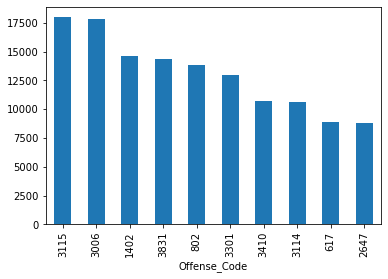

In [482]:
top_offense_code.plot.bar(x='Offense_Code', y='Incident_Number')
plt.show()

In [477]:
top_offense_code_group = data.groupby('Offense_Code_Group').count()['Incident_Number'].sort_values(ascending=False).head(10)
top_offense_code_group

Offense_Code_Group
Motor Vehicle Accident Response    30380
Larceny                            25064
Medical Assistance                 22362
Investigate Person                 17964
Other                              17022
Vandalism                          14839
Simple Assault                     14839
Drug Violation                     14388
Verbal Disputes                    12943
Towed                              10737
Name: Incident_Number, dtype: int64

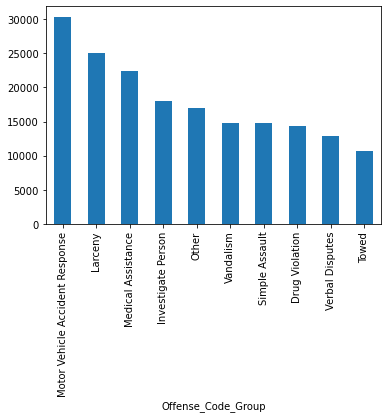

In [478]:
top_offense_code_group.plot.bar(x='Offense_Code', y='Incident_Number')
plt.show()

In [479]:
top_offense_description = data.groupby('Offense_Description').count()['Incident_Number'].sort_values(ascending=False).head(10)
top_offense_description

Offense_Description
Investigate Person                       17968
Sick/Injured/Medical - Person            17811
Vandalism                                14590
M/V - Leaving Scene - Property Damage    14364
Assault Simple - Battery                 13857
Verbal Dispute                           12943
Towed Motor Vehicle                      10737
Investigate Property                     10589
Larceny Theft From Building               8865
Threats To Do Bodily Harm                 8785
Name: Incident_Number, dtype: int64

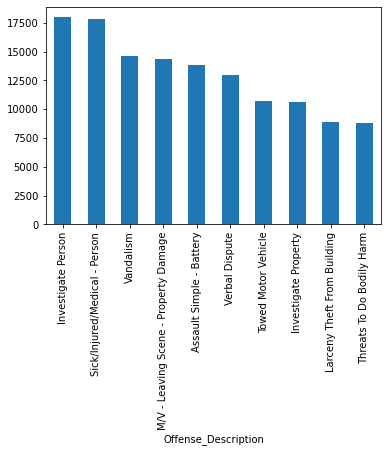

In [480]:
top_offense_description.plot.bar(x='Offense_Code', y='Incident_Number')
plt.show()

## 2. CRIMES BY LOCATION

In [485]:
top_district = data.groupby('District').count()['Incident_Number'].sort_values(ascending=False).head(12)
top_district

District
Roxbury          46035
Dorchester       40714
South End        38234
Mattapan         33685
Downtown         32066
South Boston     21627
Brighton         19102
Hyde Park        16624
Jamaica Plain    16518
East Boston      13020
West Roxbury     12770
Charlestown       6144
Name: Incident_Number, dtype: int64

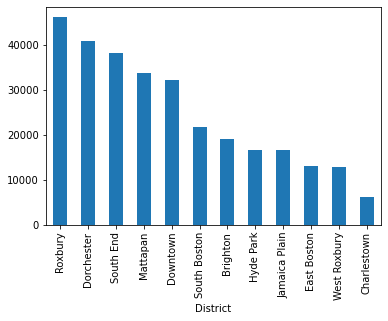

In [486]:
top_district.plot.bar(x='District', y='Incident_Number')
plt.show()

In [487]:
top_street = data.groupby('Street').count()['Incident_Number'].sort_values(ascending=False).head(12)
top_street

Street
Washington St        14113
Blue Hill Ave         6989
Boylston St           6939
Dorchester Ave        5008
Tremont St            4664
Massachusetts Ave     4392
Centre St             4286
Harrison Ave          4274
Commonwealth Ave      3867
Hyde Park Ave         3403
Columbia Rd           3051
Huntington Ave        2911
Name: Incident_Number, dtype: int64

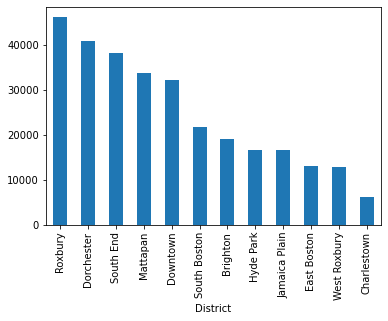

In [488]:
top_district.plot.bar(x='Street', y='Incident_Number')
plt.show()

## 3. CRIMES BY TIME

In [494]:
by_year = data.groupby('Year').count()['Incident_Number']
by_year

Year
2015    51157
2016    91552
2017    93097
2018    60742
Name: Incident_Number, dtype: int64

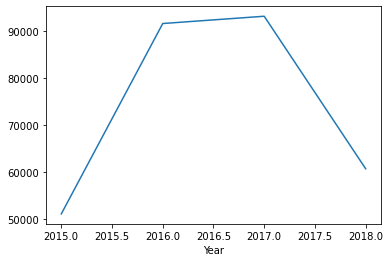

In [495]:
by_year.plot.line(x='Year', y='Incident_Number')
plt.show()

In [496]:
by_month = data.groupby('Month').count()['Incident_Number']
by_month

Month
1     22176
2     20080
3     22272
4     22410
5     24219
6     28487
7     32045
8     32197
9     24661
10    23884
11    22085
12    22032
Name: Incident_Number, dtype: int64

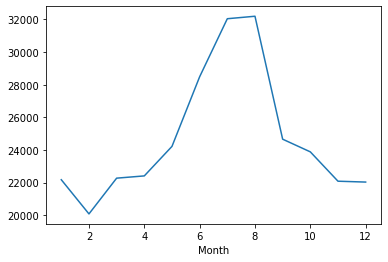

In [498]:
by_month.plot.line(x='Month', y='Incident_Number')
plt.show()

In [499]:
by_day = data.groupby('Day_Of_Week').count()['Incident_Number']
by_day

Day_Of_Week
Friday       45126
Monday       42476
Saturday     41570
Sunday       37684
Thursday     43274
Tuesday      42983
Wednesday    43435
Name: Incident_Number, dtype: int64

In [500]:
by_day = data.groupby('Day_Of_Week').count()['Incident_Number']
by_day

Day_Of_Week
Friday       45126
Monday       42476
Saturday     41570
Sunday       37684
Thursday     43274
Tuesday      42983
Wednesday    43435
Name: Incident_Number, dtype: int64

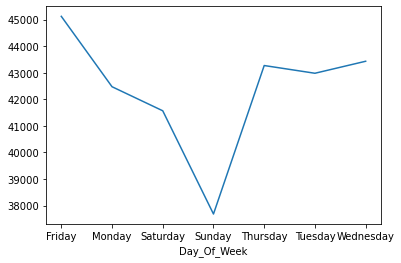

In [502]:
by_day.plot.line(x='Day_Of_Week', y='Incident_Number')
plt.show()

In [503]:
data.to_csv('data_crime.csv', index=False)

In [511]:
data.groupby(['Year', 'Month']).count()['Incident_Number']

Year  Month
2015  6        4061
      7        8023
      8        8015
      9        8044
      10       7958
      11       7467
      12       7589
2016  1        7502
      2        6800
      3        7583
      4        7549
      5        7954
      6        7959
      7        7844
      8        8084
      9        7745
      10       7803
      11       7285
      12       7444
2017  1        7453
      2        6853
      3        7518
      4        7467
      5        8057
      6        8304
      7        8314
      8        8414
      9        8262
      10       8123
      11       7333
      12       6999
2018  1        7221
      2        6427
      3        7171
      4        7394
      5        8208
      6        8163
      7        7864
      8        7684
      9         610
Name: Incident_Number, dtype: int64

Terlihat bahwa data ini mulai dicatat di bulan ke-6 tahun 2015 sampai tahun 2018 di bulan ke-9.

In [504]:
data

,Incident_Number,Offense_Code,Offense_Code_Group,Offense_Description,District,Reporting_Area,Shooting,Occurred_On_Date,Year,Month,Day_Of_Week,Hour,UCR_Part,Street,Latitude,Longitude,Location
0,I182070945,619,Larceny,Larceny All Others,Brighton,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,Lincoln St,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,Vandalism,Dorchester,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,Hecla St,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,Towed Motor Vehicle,South End,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,Cazenove St,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,Investigate Property,South End,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,Newcomb St,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,Investigate Property,Mattapan,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,Delhi St,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296543,I050310906-00,3125,Warrant Arrests,Warrant Arrest,South End,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,Coventry St,42.336951,-71.085748,"(42.33695098, -71.08574813)"
296544,I030217815-08,111,Homicide,"Murder, Non-Negligient Manslaughter",Hyde Park,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,River St,42.255926,-71.123172,"(42.25592648, -71.12317207)"
296545,I030217815-08,3125,Warrant Arrests,Warrant Arrest,Hyde Park,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,River St,42.255926,-71.123172,"(42.25592648, -71.12317207)"
296546,I010370257-00,3125,Warrant Arrests,Warrant Arrest,Jamaica Plain,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,New Washington St,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [518]:
data[data['Offense_Code_Group'] == 'Medical Assistance']['Offense_Description'].unique()

array(['Sick/Injured/Medical - Person', 'Sick/Injured/Medical - Police',
       'Death Investigation', 'Animal Control - Dog Bites - Etc.',
       'Sudden Death', 'Firearm/Weapon - Accidental Injury / Death',
       'Suicide / Suicide Attempt', 'Injury Bicycle No M/V Involved'],
      dtype=object)

In [ ]:
data[data['Offense_Code_Group'] == 'Medical Assistance'][]

In [521]:
data.columns

Index(['Incident_Number', 'Offense_Code', 'Offense_Code_Group',
       'Offense_Description', 'District', 'Reporting_Area', 'Shooting',
       'Occurred_On_Date', 'Year', 'Month', 'Day_Of_Week', 'Hour', 'UCR_Part',
       'Street', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [522]:
data['Occurred_On_Date'].describe()

count                  296548
unique                 218522
top       2017-06-01 00:00:00
freq                       28
first     2015-06-15 00:00:00
last      2018-09-03 21:25:00
Name: Occurred_On_Date, dtype: object

# 4. DATA VISUALIZATION

Data visualisai dari hasil analisis didokumentasikan dengan menggunakan Tableau Public.